# Joining Yelp Data to Original Dataset, Expensive Restaurants

#### Import dependencies

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read in CSVs

In [157]:
csv1 = pd.read_csv('joinable_kc_dataset.csv')
csv2 = pd.read_csv('yelp_restaurants.csv')

In [158]:
joinable_raw_data = pd.DataFrame(csv1)
restaurants = pd.DataFrame(csv2)

#### View the datasets

In [159]:
joinable_raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999"
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999"
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999"
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393"
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999"


In [160]:
joinable_raw_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_group', 'long_group',
       'lat+long_group'],
      dtype='object')

In [161]:
restaurants.head()

,lat+long_group,Number of Expensive Restaurants
0,"47.51670803571437,-122.2529999999999",0
1,"47.71654017857156,-122.3089999999999",0
2,"47.73874375000014,-122.2249999999999",0
3,"47.51670803571437,-122.393",1
4,"47.61662410714297,-122.0569999999999",0


#### Join datasets

In [163]:
df = joinable_raw_data.join(restaurants['Number of Expensive Restaurants'], how='outer')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,Number of Expensive Restaurants
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999",0.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999",0.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393",1.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999",0.0


#### Drop rows with no data

In [164]:
len(df)

21436

In [165]:
df2 = df.dropna()

In [166]:
len(df2)

21435

In [167]:
pd.Series(df2['price']/df2['sqft_living']).mean()

263.99122609195075

#### Plot

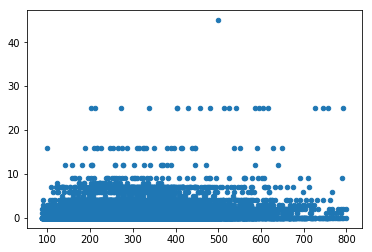

In [168]:
#plt.figure(figsize=(20,10))
plt.scatter(df2['price']/df2['sqft_living'], df2['Number of Expensive Restaurants'], s=20)
#plt.xlim(0,1250000)
plt.show()

In [169]:
df3 = df2[df2['Number of Expensive Restaurants'] >= 3]
df4 = df2[df2['Number of Expensive Restaurants'] < 3]

In [170]:
print(df3['price'].mean())
print(df3['price'].std())
print(len(df3))

651181.3486880467
500811.27682374656
1715


In [171]:
print(df4['price'].mean())
print(df4['price'].std())
print(len(df4))

531019.6134381338
352406.4713352546
19720


#### Linear Regression

In [172]:
fig, ax = plt.subplots()
fit = np.polyfit((pd.Series(df2['price']/df2['sqft_living'])),
                 df2['Number of Expensive Restaurants'], deg=1)
ax.plot(pd.Series(df2['price']/df2['sqft_living']), fit[0] 
        * pd.Series(df2['price']/df2['sqft_living']) + fit[1],
        color='red')
ax.scatter((pd.Series(df2['price']/df2['sqft_living'])),
           df2['Number of Expensive Restaurants'], s=1)
plt.xlim(0, 1000)
plt.ylim(0, 60)
plt.title('Price Per SQFT vs. # of Expensive Restaurants')
plt.xlabel('Price Per SQFT')
plt.ylabel('Number of Expensive Restaurants')



Text(0,0.5,'Number of Expensive Restaurants')

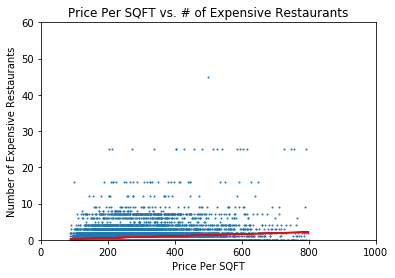

In [173]:
plt.show()

In [192]:
df2[(df2['Number of Expensive Restaurants'] >= 30)].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,Number of Expensive Restaurants
3575,6848200475,20141126T000000,933000,3,1.5,1870,3300,2.0,0,2,...,0,98102,47.6221,-122.325,1820,2460,47.616624,-122.337,"47.61662410714297,-122.3369999999999",45.0


In [195]:
df2[(df2['Number of Expensive Restaurants'] >= 20) & (pd.Series(df2['price']/df2['sqft_living']) < 1000)].head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,Number of Expensive Restaurants
520,4348800030,20141121T000000,727500,2,2.00,1240,9119,1.0,0,0,...,0,98004,47.6221,-122.193,1380,9121,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0
1260,4389200765,20140625T000000,2300000,4,3.25,4250,8570,2.0,0,0,...,0,98004,47.6154,-122.210,2830,12821,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0
1270,8964800445,20150209T000000,2260000,3,3.50,3110,14872,1.0,0,0,...,0,98004,47.6178,-122.209,3110,12433,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0
1519,4395600060,20140630T000000,935000,2,2.50,1780,2067,2.0,0,0,...,0,98004,47.6132,-122.210,2320,2067,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0
1569,8964800370,20141022T000000,1380000,3,1.50,1850,10572,1.0,0,0,...,0,98004,47.6194,-122.208,3030,12752,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0
2716,1552100135,20140609T000000,1150000,3,2.50,2850,10474,1.0,0,0,...,0,98004,47.6218,-122.209,2820,10474,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0
3575,6848200475,20141126T000000,933000,3,1.50,1870,3300,2.0,0,2,...,0,98102,47.6221,-122.325,1820,2460,47.616624,-122.337,"47.61662410714297,-122.3369999999999",45.0
5812,4348800080,20140711T000000,641200,3,1.00,1060,9123,1.0,0,0,...,0,98004,47.6218,-122.193,1620,9121,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0
6306,4340000080,20150327T000000,1450000,4,3.50,2820,7809,2.0,0,0,...,0,98004,47.6220,-122.195,2630,7904,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0
6768,8964800225,20150303T000000,1430000,3,2.00,1890,12017,1.0,0,2,...,0,98004,47.6203,-122.210,2000,12210,47.616624,-122.197,"47.61662410714297,-122.1969999999999",25.0


In [177]:
df2['price']/df2['sqft_living']

0        188.050847
1        209.338521
2        233.766234
3        308.163265
4        303.571429
5        226.937269
6        150.145773
7        275.330189
8        128.932584
9        170.899471
10       186.095506
11       403.448276
12       216.783217
13       291.970803
14       292.817680
15       220.338983
16       208.994709
17       303.125000
18       157.500000
19       184.000000
20       237.654321
21       655.737705
22       125.550661
23       236.168224
24       134.285714
25       136.257310
26       382.448980
27       476.428571
28       288.157895
29       279.766537
            ...    
21405    326.666667
21406    563.309859
21407    301.587302
21408    144.385027
21409    353.146853
21410    253.289474
21411    342.561983
21412    136.811024
21413    248.472505
21414    206.498195
21415    399.159664
21416    261.390887
21417    140.000000
21418    339.869281
21419    188.875000
21420    463.343109
21421    173.765234
21422    203.007519
21423    344.519016


#### Pearson's Correlation

In [178]:
pd.Series(df2['price']/df2['sqft_living']).corr(df2['Number of Expensive Restaurants'])

0.17574588613024839

Correlation is weak

In [179]:
x = np.arange(1,21437,1)
x

array([    1,     2,     3, ..., 21434, 21435, 21436])

In [180]:
corrs = []
for a in x:
    b = df2['price'].head(a).corr(df2['Number of Expensive Restaurants'].head(a))
    corrs.append(b)
    

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


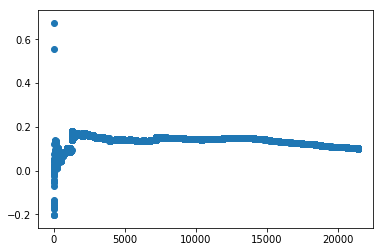

In [181]:
plt.scatter(x,corrs)
#plt.xlim(0,2000)
plt.show()